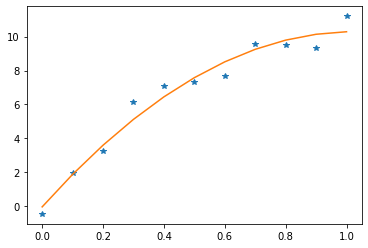

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

xdata = np.linspace(0,1,11)
ydata = np.array([-0.447, 1.978, 3.28, 6.16, 7.08, 7.34, 7.66, 9.56, 9.48, 9.30, 11.2])

p = np.polyfit(xdata, ydata, 2) # 拟合二次多项式，返回p为高次到低次系数
yhat = np.polyval(p, [0.25, 0.35]) # 使用p对列表中数据做预测

plt.plot(xdata, ydata, '*', xdata, np.polyval(p, xdata), '-')
plt.show()

拟合的参数: [-9.81083901 20.12929291 -0.03167108]
预测值: [4.38747471 5.81175366]


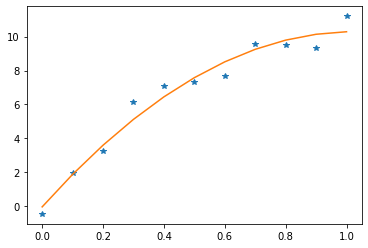

In [2]:
# 拟合二次多项式
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
%matplotlib inline

y = lambda x, a, b, c : a*x**2 + b*x + c
xdata = np.arange(0, 1.1, 0.1)
ydata = np.array([-0.447, 1.978, 3.28, 6.16, 7.08, 7.34, 7.66, 9.56, 9.48, 9.30, 11.2])

popt, pcov = curve_fit(y, xdata, ydata)

print('拟合的参数:', popt)
print('预测值:', y(np.array([0.25, 0.35]), *popt))

# ynew = lambda x: *popt[0]*x**2 + popt[1]*x + *popt[2]

plt.plot(xdata, ydata, '*', xdata, y(xdata, *popt))
plt.savefig('sicpy_2_fitting')
plt.show()

a, b, c拟合值为: [ 5.08907437e+00 -2.58251503e-03 -2.14509797e-02]


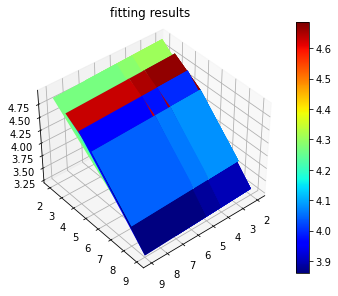

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from mpl_toolkits import mplot3d
from matplotlib.ticker import MaxNLocator
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

xdata = np.array([6, 2, 6, 7, 4, 2, 5, 9])
ydata = np.array([4, 9, 5, 3, 8, 5, 8, 2])
zdata = np.array([5, 2, 1, 9, 7, 4, 3, 3])
xydata = np.vstack((xdata, ydata))

def Pfun(t, a, b, c):
    return a*np.exp(b*t[0]) + c*t[1]**2

popt, pocv = curve_fit(Pfun ,xydata, zdata)
print('a, b, c拟合值为:', popt)

X, Y = np.meshgrid(xdata, ydata)
Z = Pfun([X, Y], *popt)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet, linewidth=0)
fig.colorbar(surf)
title = ax.set_title("fitting results")
title.set_y(1.01)
ax.view_init(40, 50)
fig.tight_layout()

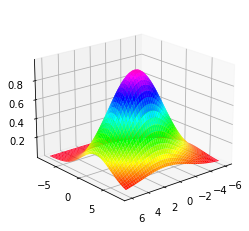

In [4]:
from mpl_toolkits import mplot3d
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

m = 200
n = 300
x = np.linspace(-6, 6, m)
y = np.linspace(-8, 8, n)
x2, y2 = np.meshgrid(x, y)
x3 = np.reshape(x2, (1, -1))
y3 = np.reshape(y2, (1, -1))
xy = np.vstack((x3, y3))

def Pfun(t, m1, m2, s):
    return np.exp(-((t[0] - m1) ** 2 + (t[1] - m2) ** 2) / (2 * s ** 2))
z = Pfun(xy, 1, 2, 3)
zr = z + 0.2 * np.random.normal(size=z.shape) # 为数据添加噪声

popt, pcov = curve_fit(Pfun, xy, zr)  # 拟合参数
zn = Pfun(xy, *popt)
zn2 = np.reshape(zn, x2.shape)

ax = plt.axes(projection='3d') # 三维对象
ax.plot_surface(x2, y2, zn2, cmap='gist_rainbow')
ax.view_init(20, 50)
plt.savefig('3dfitting')
plt.show()